Note this uses latex as its output printer,
You can download that from here: https://miktex.org/download

In [1]:
from sympy import *
from IPython.display import display

init_printing(use_latex=True)

#initialization of symbols in 
i = Symbol('i', integer=True)
a = Symbol('a')
n_i = Symbol('n_i', integer=True)
n = Symbol('N', integer=True)
k = Symbol('k', integer=True)

r = IndexedBase('r')

w_i = Symbol('w_i')
s_udh = Symbol('S_UDH')
U_i = Symbol('U_i')
U_g = Symbol('U_i^G')
min = Symbol('min')
max = Symbol('max')

This is Dominance Formula as in the research paper:

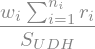

In [2]:
sigma_r_i = Sum(r[i], (i, 1, n_i))
U_i = w_i * sigma_r_i / s_udh
display(U_i)

The Sum of Upper dominant half is defined by:

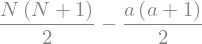

In [3]:
s_udh = n*(n+1)/2 - a*(a+1)/2
display(s_udh)

And the weight bias by:

In [4]:
w_i = n/(k * n_i)
display(w_i)

If, we assume that total number of items, across all groups, is odd.

Then, its safe to assume a = N-1/2, then $S_{UDH} = $ 

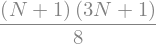

In [5]:
a = (n-1)/2
s_udh = n*(n+1)/2 - a*(a+1)/2
display(simplify(s_udh))

Note, the minimum feasible value of the expression $\frac{\sum r_i}{n_i}$ is: 1, with lowest rank = 1, with a group containing a single element, thus, $n_i=1$,

Therefore the minima of the $U_i$:

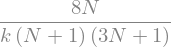

In [6]:
U_i = w_i * sigma_r_i / s_udh
minima = U_i.subs({n_i:1}) #number of elements = 1
minima = minima.doit()
minima = minima.subs({r[1]:1}) #containing one element rank = 1
display(simplify(minima))

maximum value would be opposite of minima, which is containing ranks = [2,3,...N], and $n_i$ = N-1

Therefore the maxima of the U_i, would be:

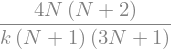

In [7]:
# Calculate the sum from 2 to n
sigma_r_i = Sum(i, (i, 2, n))
sigma_r_i = sigma_r_i.doit()
U_i = w_i * sigma_r_i / s_udh
maxima = U_i.subs({i:2,n_i:n-1})
display(factor(maxima))


So, final global Ui would be calculated as:

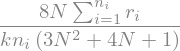

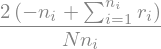

In [ ]:
i = Symbol('i', integer=True)
a = Symbol('a')
n_i = Symbol('n_i', integer=True)
n = Symbol('N', integer=True)
k = Symbol('k', integer=True)

r = IndexedBase('r')

U_i = Symbol('U_i')


sigma_r_i = Sum(r[i], (i, 1, n_i))
U_i = w_i * sigma_r_i / s_udh

U_g = (U_i - minima)/(maxima - minima)
display(factor(U_g))